In [1]:
import cv2
import os

def analyze_video_dataset(folder_path):
    video_stats = []
    for video_name in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_name)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            continue
        
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        duration = frame_count / fps
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        video_stats.append({
            "name": video_name,
            "frames": frame_count,
            "fps": fps,
            "duration": duration,
            "resolution": f"{width}x{height}"
        })
        cap.release()
    
    return video_stats

# Analyze a folder of videos
stats = analyze_video_dataset("F:/video_data/original")
for stat in stats:
    print(stat)


{'name': '000.mp4', 'frames': 396, 'fps': 25, 'duration': 15.84, 'resolution': '640x480'}
{'name': '001.mp4', 'frames': 460, 'fps': 25, 'duration': 18.4, 'resolution': '1280x720'}
{'name': '002.mp4', 'frames': 693, 'fps': 30, 'duration': 23.1, 'resolution': '1280x720'}
{'name': '003.mp4', 'frames': 303, 'fps': 25, 'duration': 12.12, 'resolution': '640x480'}
{'name': '004.mp4', 'frames': 309, 'fps': 25, 'duration': 12.36, 'resolution': '1280x720'}
{'name': '005.mp4', 'frames': 385, 'fps': 25, 'duration': 15.4, 'resolution': '720x480'}
{'name': '006.mp4', 'frames': 310, 'fps': 30, 'duration': 10.333333333333334, 'resolution': '1280x720'}
{'name': '007.mp4', 'frames': 505, 'fps': 25, 'duration': 20.2, 'resolution': '600x480'}
{'name': '008.mp4', 'frames': 637, 'fps': 25, 'duration': 25.48, 'resolution': '640x480'}
{'name': '009.mp4', 'frames': 588, 'fps': 30, 'duration': 19.6, 'resolution': '640x480'}
{'name': '010.mp4', 'frames': 474, 'fps': 25, 'duration': 18.96, 'resolution': '640x480'

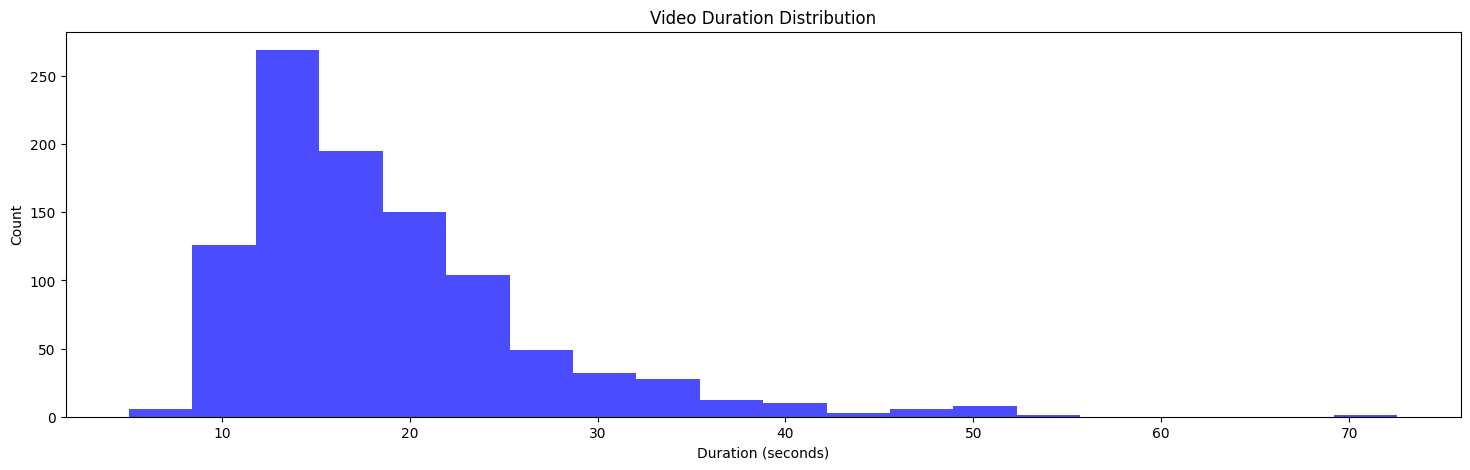

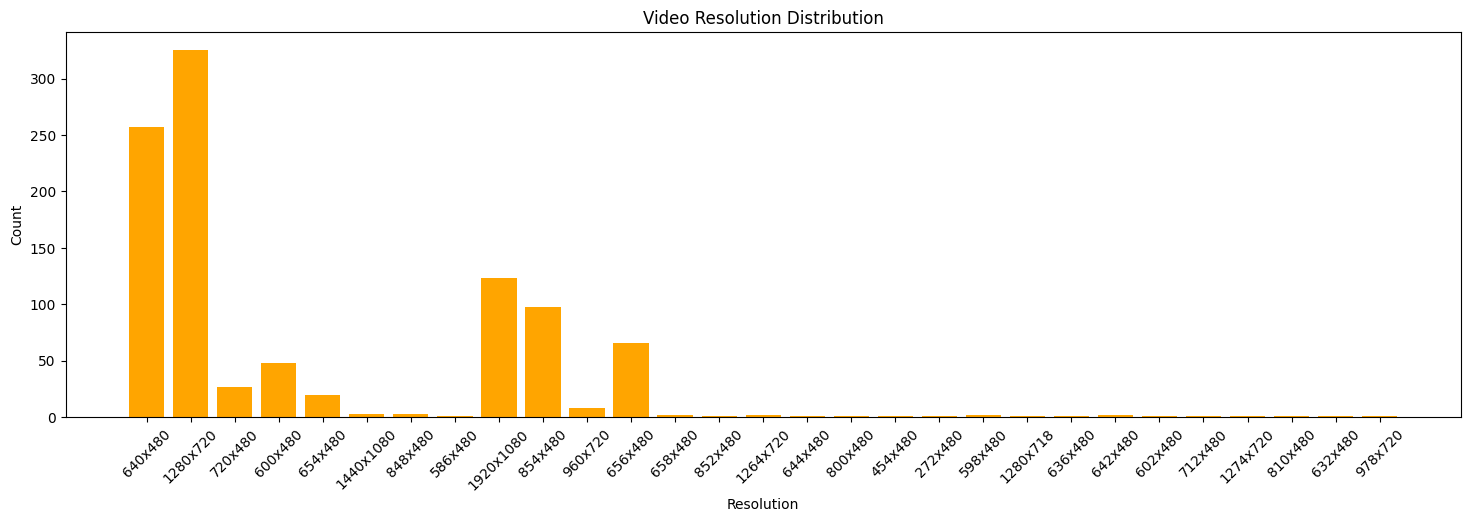

In [5]:
import matplotlib.pyplot as plt

# Example stats
video_durations = [stat["duration"] for stat in stats]
resolutions = [stat["resolution"] for stat in stats]

# Plot duration histogram
plt.figure(figsize=(18, 5))
plt.hist(video_durations, bins=20, color='blue', alpha=0.7)
plt.title("Video Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()

# Plot resolution frequencies
from collections import Counter
resolution_counts = Counter(resolutions)
plt.figure(figsize=(18, 5))
plt.bar(resolution_counts.keys(), resolution_counts.values(), color='orange')
plt.title("Video Resolution Distribution")
plt.xlabel("Resolution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [9]:
def detect_blurriness(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

blur_scores = []
cap = cv2.VideoCapture("F:/video_data/original/000.mp4")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    blur_scores.append(detect_blurriness(frame))
cap.release()

print(f"Average Blur Score: {sum(blur_scores) / len(blur_scores)}")


Average Blur Score: 208.18080633267863


In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def compute_temporal_inconsistency(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Could not read {video_path}")
        return []
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    motion_diffs = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        motion_diffs.append(np.mean(np.abs(flow)))
        prev_gray = gray

    cap.release()
    return motion_diffs

def analyze_random_videos(folder_path, num_videos=3):
    video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.avi', '.mkv'))]
    selected_files = random.sample(video_files, min(len(video_files), num_videos))
    video_motion_data = {}
    
    for video_file in selected_files:
        video_path = os.path.join(folder_path, video_file)
        print(f"Processing {video_file}...")
        motion_diffs = compute_temporal_inconsistency(video_path)
        if motion_diffs:  # Avoid adding empty results
            motion_variability = np.std(motion_diffs)
            video_motion_data[video_file] = motion_variability
    return video_motion_data

# Folder paths for original and manipulated videos
original_folder = "F:/video_data/original"
manipulated_folder = "F:/video_data/deepfakes"

# Analyze a random subset of videos
original_motion = analyze_random_videos(original_folder, num_videos=5)
manipulated_motion = analyze_random_videos(manipulated_folder, num_videos=5)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot original videos
plt.bar(list(original_motion.keys()), list(original_motion.values()), color='blue', alpha=0.6, label='Original')

# Plot manipulated videos
plt.bar(list(manipulated_motion.keys()), list(manipulated_motion.values()), color='red', alpha=0.6, label='Manipulated')

plt.xlabel("Videos")
plt.ylabel("Motion Variability")
plt.title("Motion Variability in Randomly Selected Videos")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Processing 312.mp4...
Processing 604.mp4...


KeyboardInterrupt: 